# CNN AlexNet

## Loading and preprocessing the data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [3]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


## Resize image

In [5]:
image_size=[227, 227]

X_train_resize = tf.image.resize(
    X_train, size=image_size, method=tf.image.ResizeMethod.BICUBIC, preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

X_test_resize = tf.image.resize(
    X_test, size=image_size, method=tf.image.ResizeMethod.BICUBIC, preserve_aspect_ratio=False,
    antialias=False, name=None
).numpy()

print(X_train_resize.shape)
print(X_test_resize.shape)

(2000, 227, 227, 1)
(2000, 227, 227, 1)


In [6]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(227,227,1)),
    tf.keras.layers.Conv2D(
        filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', 
        activation='relu', name='C1'),
    tf.keras.layers.MaxPool2D(
        pool_size=(3,3), strides=(2,2), name='S2'),
    tf.keras.layers.Conv2D(
        filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', 
        padding="same", name='C3'),
    tf.keras.layers.MaxPool2D(
        pool_size=(3,3), strides=(2,2), name='S4'),
    tf.keras.layers.Conv2D(
        filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', 
        padding="same", name='C5'),
    tf.keras.layers.Conv2D(
        filters=384, kernel_size=(3,3), strides=(1,1), activation='relu',
        padding="same", name='C6'),
    tf.keras.layers.Conv2D(
        filters=256, kernel_size=(3,3), strides=(1,1), activation='relu',
        padding="same", name='C7'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', name='F8'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', name='F9'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 55, 55, 96)        11712     
_________________________________________________________________
S2 (MaxPooling2D)            (None, 27, 27, 96)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 27, 27, 256)       614656    
_________________________________________________________________
S4 (MaxPooling2D)            (None, 13, 13, 256)       0         
_________________________________________________________________
C5 (Conv2D)                  (None, 13, 13, 384)       885120    
_________________________________________________________________
C6 (Conv2D)                  (None, 13, 13, 384)       1327488   
_________________________________________________________________
C7 (Conv2D)                  (None, 13, 13, 256)       8

In [8]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [9]:
history = model.fit(X_train_resize, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
57/57 [==============================] - 33s 583ms/step - loss: 2.3837 - accuracy: 0.1128 - val_loss: 2.2413 - val_accuracy: 0.2150
Epoch 2/20
57/57 [==============================] - 33s 582ms/step - loss: 2.0580 - accuracy: 0.2328 - val_loss: 1.6102 - val_accuracy: 0.4700
Epoch 3/20
57/57 [==============================] - 33s 580ms/step - loss: 1.6101 - accuracy: 0.4394 - val_loss: 1.0094 - val_accuracy: 0.7500
Epoch 4/20
57/57 [==============================] - 33s 580ms/step - loss: 1.3267 - accuracy: 0.5656 - val_loss: 0.9400 - val_accuracy: 0.7650
Epoch 5/20
57/57 [==============================] - 33s 580ms/step - loss: 1.1685 - accuracy: 0.6467 - val_loss: 0.5576 - val_accuracy: 0.9150
Epoch 6/20
57/57 [==============================] - 33s 579ms/step - loss: 0.9918 - accuracy: 0.6956 - val_loss: 0.5440 - val_accuracy: 0.8950
Epoch 7/20
57/57 [==============================] - 33s 580ms/step - loss: 0.8679 - accuracy: 0.7411 - val_loss: 0.5567 - val_accuracy: 0.8900

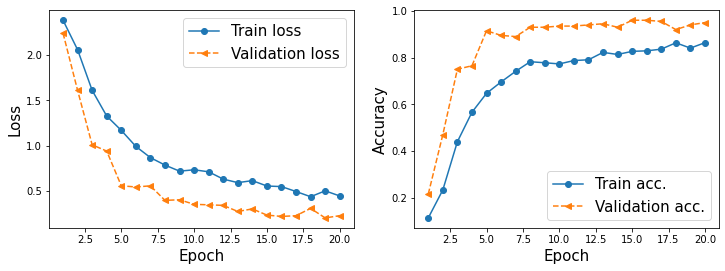

In [10]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [11]:
test_results = model.evaluate(X_test_resize, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 6s 101ms/step - loss: 0.2686 - accuracy: 0.9415

Test Acc. 94.15%


In [12]:
# Find misclassification
y_pred_tf = model(X_test_resize)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 117


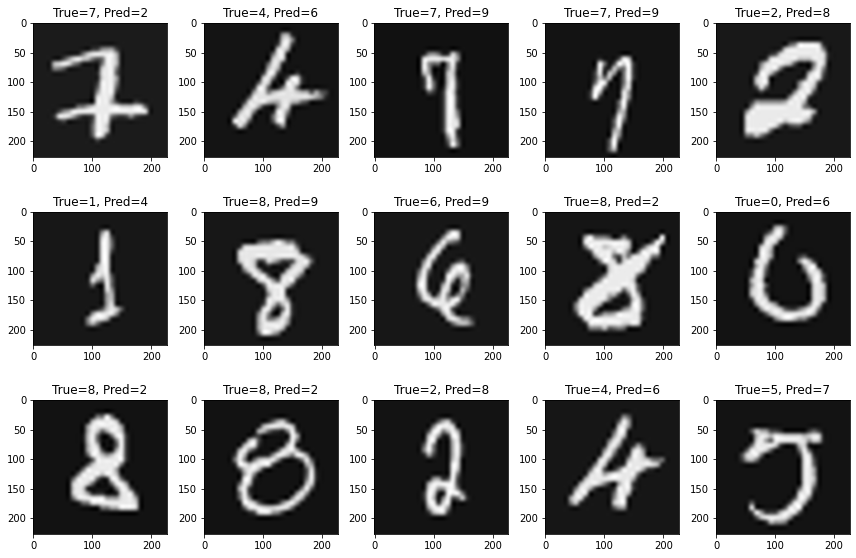

In [13]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test_resize[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()